In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv('Global2.csv')

In [80]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


In [81]:
df.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [83]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null datetime64[ns]
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


In [85]:
df.shape

(51290, 6)

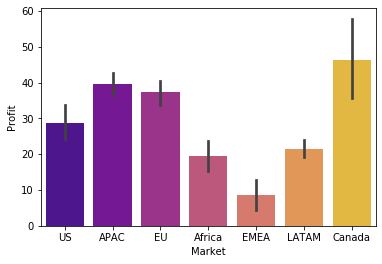

In [86]:
sns.barplot(x ='Market', y ='Profit', data = df, palette ='plasma')

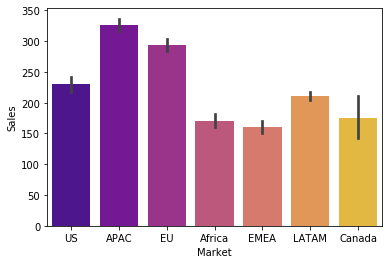

In [87]:
sns.barplot(x ='Market', y ='Sales', data = df, palette ='plasma')

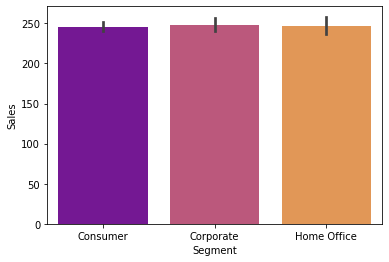

In [88]:
sns.barplot(x ='Segment', y ='Sales', data = df, palette ='plasma')

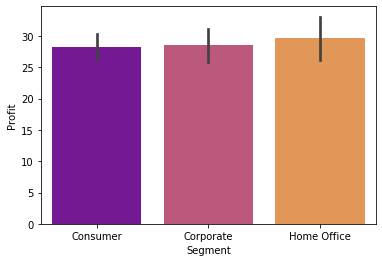

In [89]:
sns.barplot(x ='Segment', y ='Profit', data = df, palette ='plasma')

In [90]:
df["market_segment"] = df["Market"] + df["Segment"]
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer


In [91]:
df.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


In [92]:
df['ord_year'] = pd.DatetimeIndex(df['Order Date']).year
df['ord_month'] = pd.DatetimeIndex(df['Order Date']).month
df['ord_month'] =  df['ord_month'].map("{:02}".format)

In [93]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment,ord_year,ord_month
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer,2012,07
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate,2013,05
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer,2013,10
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office,2013,01
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer,2013,05


In [94]:
df['ord_mon'] =  df['ord_year'].astype(str) +'-'+ df['ord_month'].astype(str) 
df['ord_mon'] = pd.to_datetime(df['ord_mon'])

In [95]:
df.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,market_segment,ord_year,ord_month,ord_mon
0,2012-07-31,Consumer,US,2309.650,7,762.1845,USConsumer,2012,07,2012-07-01
1,2013-05-02,Corporate,APAC,3709.395,9,-288.7650,APACCorporate,2013,05,2013-05-01
2,2013-10-17,Consumer,APAC,5175.171,9,919.9710,APACConsumer,2013,10,2013-10-01
3,2013-01-28,Home Office,EU,2892.510,5,-96.5400,EUHome Office,2013,01,2013-01-01
4,2013-05-11,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer,2013,05,2013-05-01


In [96]:
df.nunique()

Order Date         1430
Segment               3
Market                7
Sales             22995
Quantity             14
Profit            24575
market_segment       21
ord_year              4
ord_month            12
ord_mon              48
dtype: int64

In [97]:
df_ag = df.pivot_table(index = 'ord_mon', values ='Profit', columns = 'market_segment', aggfunc = 'sum')

In [98]:
df_ag.shape

(48, 21)

In [99]:
df_ag.head()

market_segment,APACConsumer,APACCorporate,APACHome Office,AfricaConsumer,AfricaCorporate,AfricaHome Office,CanadaConsumer,CanadaCorporate,CanadaHome Office,EMEAConsumer,...,EMEAHome Office,EUConsumer,EUCorporate,EUHome Office,LATAMConsumer,LATAMCorporate,LATAMHome Office,USConsumer,USCorporate,USHome Office
ord_mon,,,,,,,,,,,,,,,,,,,,,
2011-01-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02-01,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03-01,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04-01,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05-01,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [100]:
df_ag.nunique()

market_segment
APACConsumer         48
APACCorporate        48
APACHome Office      48
AfricaConsumer       48
AfricaCorporate      48
AfricaHome Office    48
CanadaConsumer       43
CanadaCorporate      39
CanadaHome Office    28
EMEAConsumer         48
EMEACorporate        48
EMEAHome Office      47
EUConsumer           48
EUCorporate          48
EUHome Office        48
LATAMConsumer        48
LATAMCorporate       48
LATAMHome Office     48
USConsumer           48
USCorporate          48
USHome Office        48
dtype: int64

In [101]:
df_ag.shape

(48, 21)

In [102]:
#dropping the null values as they dont have sales on that particular market_segment
df_agg = df_ag.drop(['CanadaConsumer','CanadaCorporate','CanadaHome Office','EMEAHome Office'], axis =1)
df_agg.head()

market_segment,APACConsumer,APACCorporate,APACHome Office,AfricaConsumer,AfricaCorporate,AfricaHome Office,EMEAConsumer,EMEACorporate,EUConsumer,EUCorporate,EUHome Office,LATAMConsumer,LATAMCorporate,LATAMHome Office,USConsumer,USCorporate,USHome Office
ord_mon,,,,,,,,,,,,,,,,,
2011-01-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,-2952.594,555.426,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02-01,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,464.160,1067.562,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03-01,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,706.380,698.502,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04-01,633.6423,90.7521,603.8478,381.315,941.751,417.618,121.353,178.314,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05-01,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,172.554,964.140,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [103]:
df_agg.shape

(48, 17)

In [104]:
df_agg.isnull().sum()

market_segment
APACConsumer         0
APACCorporate        0
APACHome Office      0
AfricaConsumer       0
AfricaCorporate      0
AfricaHome Office    0
EMEAConsumer         0
EMEACorporate        0
EUConsumer           0
EUCorporate          0
EUHome Office        0
LATAMConsumer        0
LATAMCorporate       0
LATAMHome Office     0
USConsumer           0
USCorporate          0
USHome Office        0
dtype: int64

In [105]:
voc = (np.std(df_agg)/df_agg.mean()).sort_values(ascending =True)


In [106]:
voc

market_segment
APACCorporate        0.519788
APACConsumer         0.566454
EUConsumer           0.579828
LATAMConsumer        0.682350
EUCorporate          0.719245
LATAMCorporate       0.818241
USConsumer           0.935708
USCorporate          0.965361
EUHome Office        0.986965
APACHome Office      0.989954
LATAMHome Office     1.032008
USHome Office        1.038175
AfricaConsumer       1.236451
AfricaCorporate      1.854581
AfricaHome Office    1.892697
EMEAConsumer         2.110413
EMEACorporate        4.350238
dtype: float64

In [107]:
df_apac = df_agg['APACCorporate'] 

In [108]:
df_apac.head()

ord_mon
2011-01-01    -173.7264
2011-02-01    3600.7776
2011-03-01    3634.9365
2011-04-01      90.7521
2011-05-01    1028.4489
Name: APACCorporate, dtype: float64

In [109]:
data

,Sales
ord_mon,
2011-01,5554.5036
2011-02,22817.1876
2011-03,18141.3765
2011-04,7326.6621
2011-05,15598.7889
2011-06,30054.4806
2011-07,10524.5985
2011-08,32767.6923
2011-09,13982.6607


In [110]:
df_ap = df[df['market_segment'] ==  'APACCorporate']
data = df_ap[['ord_mon', 'Sales']]
data = data.groupby(['ord_mon']).sum()
data = data.sort_values(by=['ord_mon'])
data.head()

,Sales
ord_mon,
2011-01-01,5554.5036
2011-02-01,22817.1876
2011-03-01,18141.3765
2011-04-01,7326.6621
2011-05-01,15598.7889


### Plot time series data¶

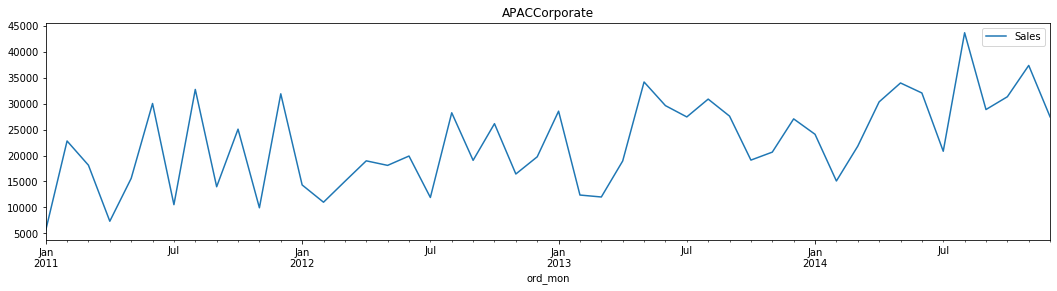

In [114]:
data.plot(figsize=(18, 4))
plt.legend(loc='best')
plt.title('APACCorporate')
plt.show(block=False)

In [115]:
data.head()

,Sales
ord_mon,
2011-01-01,5554.5036
2011-02-01,22817.1876
2011-03-01,18141.3765
2011-04-01,7326.6621
2011-05-01,15598.7889


In [116]:
data.shape

(48, 1)

In [117]:
type(data)

pandas.core.frame.DataFrame

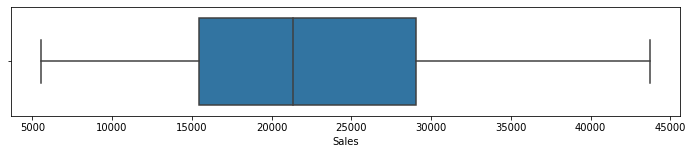

In [118]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Sales'],whis=1.5)

In [119]:
data.describe([0.99])

,Sales
count,48.000000
mean,22468.048225
std,8622.600218
min,5554.503600
50%,21327.100800
99%,40747.606866
max,43713.636900


In [120]:
data.shape

(48, 1)

In [121]:
train_len = 42
train = data[0:train_len] # first 42 month records as training set
test = data[train_len:] # last 6 month records as test set

In [122]:
train.index.min()

Timestamp('2011-01-01 00:00:00')

In [123]:
train.index.max()

Timestamp('2014-06-01 00:00:00')

In [124]:
train[::]

,Sales
ord_mon,
2011-01-01,5554.5036
2011-02-01,22817.1876
2011-03-01,18141.3765
2011-04-01,7326.6621
2011-05-01,15598.7889
2011-06-01,30054.4806
2011-07-01,10524.5985
2011-08-01,32767.6923
2011-09-01,13982.6607


### ADF Test

In [125]:

from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data['Sales'])
print('ADF statitistic: %f '%adf_test[0])
print("Critical value @ 0.05: %.2f"%adf_test[4]['5%'])
print('P-Value: %f' %adf_test[1])

ADF statitistic: -6.086823 
Critical value @ 0.05: -2.93
P-Value: 0.000000


### KPSS test

In [126]:
#stationarity Check
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data['Sales'])
print('kpss statitistic: %f '%kpss_test[0])
print("Critical value @ 0.05: %.2f"%kpss_test[3]['5%'])
print('P-Value: %f' %kpss_test[1])

kpss statitistic: 0.548683 
Critical value @ 0.05: 0.46
P-Value: 0.030702


### Inference:

It is showing that ADF Series is stationary. Where as KPSS is not stationary.

### Boxcox Transformation

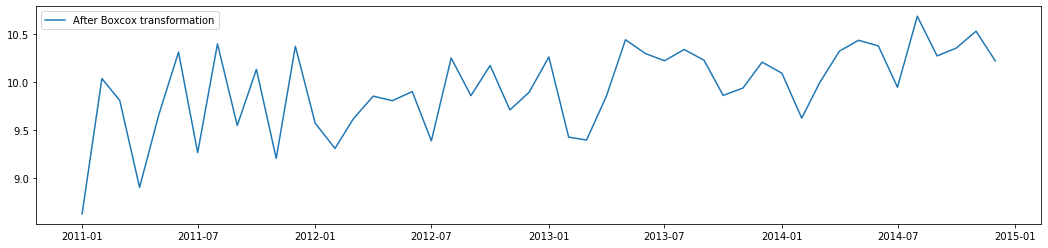

In [128]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'],lmbda=0),index=data.index)
plt.figure(figsize=(18,4))
plt.plot(data_boxcox,label='After Boxcox transformation')
plt.legend(loc='best')
plt.show()

### Differencing


In [129]:
data_boxcox.head()

ord_mon
2011-01-01     8.622364
2011-02-01    10.035269
2011-03-01     9.805951
2011-04-01     8.899275
2011-05-01     9.654949
dtype: float64

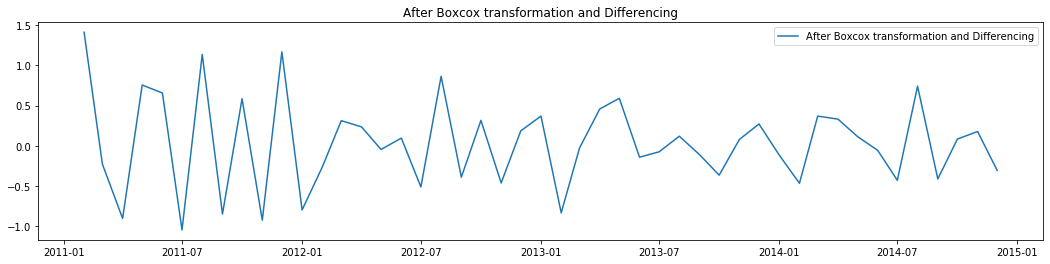

In [130]:
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),index=data.index)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(18,4))
plt.plot(data_boxcox_diff,label='After Boxcox transformation and Differencing')
plt.legend(loc='best')
plt.title("After Boxcox transformation and Differencing")
plt.show()

### Autocorrelation function (ACF) plot


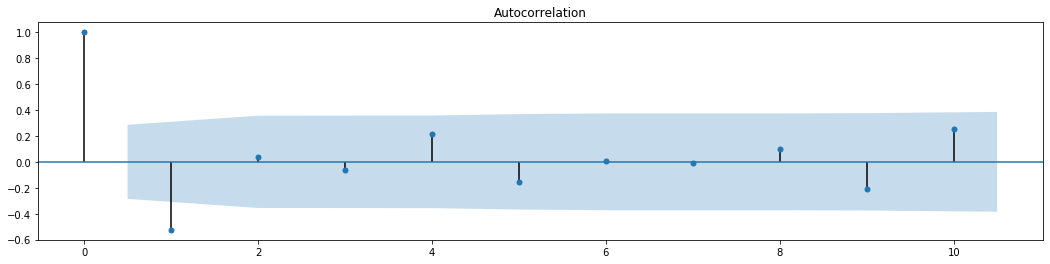

In [131]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(18,4))
plot_acf(data_boxcox_diff,ax=plt.gca(),lags=10)
plt.show()

### Partial Autocorrelation function (PACF) plot


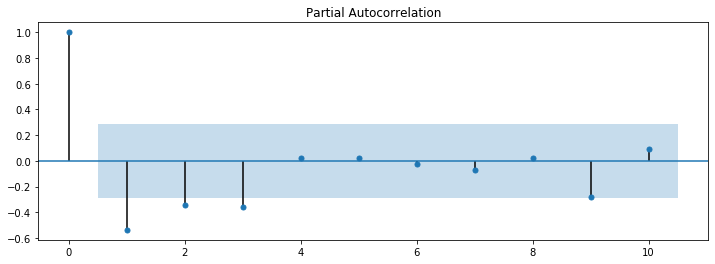

In [132]:

from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff,ax=plt.gca(),lags=10)
plt.show()

### Split into train and test data sets


In [133]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [134]:
### Auto Regression Method (AR)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff,order = (1,0,0))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   41
Model:                     ARMA(1, 0)   Log Likelihood                 -28.794
Method:                       css-mle   S.D. of innovations              0.486
Date:                Sat, 15 Aug 2020   AIC                             63.589
Time:                        19:04:24   BIC                             68.730
Sample:                    02-01-2011   HQIC                            65.461
                         - 06-01-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.048      0.644      0.524      -0.064       0.126
ar.L1.y       -0.5823      0.136     -4.289      0.000      -0.848      -0.316
                                    Roots           

### Recover original time series forecast

In [135]:
data_boxcox_diff.index.min()

Timestamp('2011-02-01 00:00:00')

In [136]:
data_boxcox_diff.index.max()

Timestamp('2014-12-01 00:00:00')

In [137]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
                                                        #'2014-02-05 00:00:00')
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

y_hat_ar['ar_forecast_boxcox_diff']

2011-02-01    0.031177
2011-03-01   -0.773359
2011-04-01    0.182856
2011-05-01    0.577259
2011-06-01   -0.390674
2011-07-01   -0.332531
2011-08-01    0.660303
2011-09-01   -0.611968
2011-10-01    0.545205
2011-11-01   -0.291289
2011-12-01    0.589701
2012-01-01   -0.631096
2012-02-01    0.515687
2012-03-01    0.203499
2012-04-01   -0.132148
2012-05-01   -0.087110
2012-06-01    0.076847
2012-07-01   -0.005917
2012-08-01    0.348440
2012-09-01   -0.453744
2012-10-01    0.278058
2012-11-01   -0.134288
2012-12-01    0.319562
2013-01-01   -0.057703
2013-02-01   -0.165323
2013-03-01    0.536248
2013-04-01    0.067272
2013-05-01   -0.216607
2013-06-01   -0.294406
2013-07-01    0.132744
2013-08-01    0.093847
2013-09-01   -0.019387
2013-10-01    0.114769
2013-11-01    0.263186
2013-12-01    0.004270
2014-01-01   -0.108115
2014-02-01    0.117022
2014-03-01    0.322042
2014-04-01   -0.165188
2014-05-01   -0.143211
2014-06-01   -0.016722
2014-07-01    0.083383
2014-08-01    0.000780
2014-09-01 

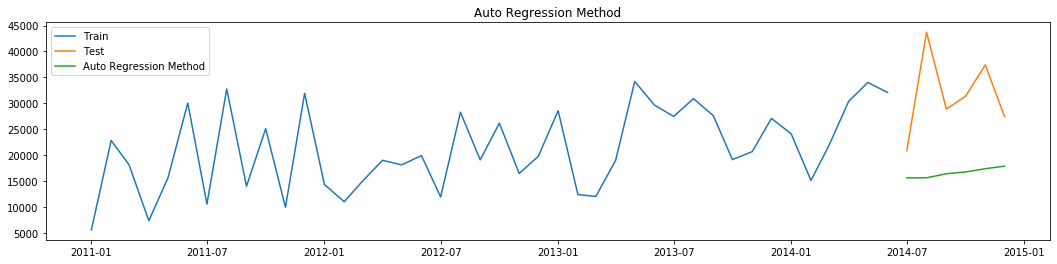

In [138]:
plt.figure(figsize=(18,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto Regression Method')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [139]:
test.index.min()

Timestamp('2014-07-01 00:00:00')

In [140]:
### Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
tempResults

,Method,RMSE,MAPE
0,Auto Regressive (AR) method,16735.49,44.64


In [142]:
### Moving Average Method (MA)

model = ARIMA(train_data_boxcox_diff,order = (0,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.017057
ma.L1.y   -0.999948
dtype: float64


In [143]:

### Recover original time series forecast

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] =y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

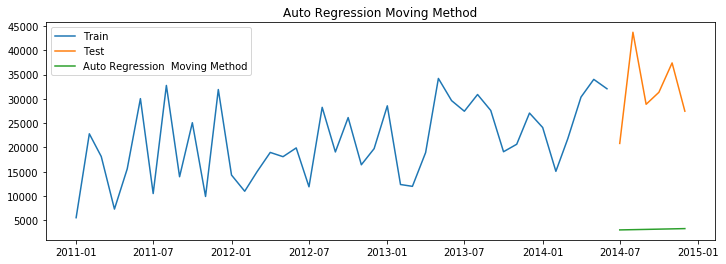

In [144]:

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Auto Regression  Moving Method')
plt.legend(loc='best')
plt.title('Auto Regression Moving Method')
plt.show()

In [146]:

### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)


In [147]:
results = pd.DataFrame({'Method':['Auto Regressive Moving (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive Moving (MA) method,29359.20,89.41
0,Auto Regressive (AR) method,16735.49,44.64


In [148]:

### Auto Regressive Moving Average Method (ARMA)

model = ARIMA(train_data_boxcox_diff,order = (4,0,3))
model_fit=model.fit()
print(model_fit.params)

const      0.016424
ar.L1.y   -1.467958
ar.L2.y   -1.301635
ar.L3.y   -0.504923
ar.L4.y   -0.116683
ma.L1.y    0.336057
ma.L2.y   -0.336057
ma.L3.y   -1.000000
dtype: float64


In [149]:
### Recover original time series forecast

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum() 
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

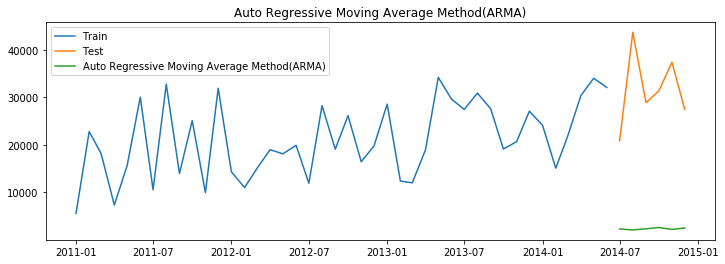

In [151]:
### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto Regressive Moving Average Method(ARMA)')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method(ARMA)')
plt.show()

In [153]:
### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Moving Average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive Moving (MA) method,29359.20,89.41
0,Auto Regressive (AR) method,16735.49,44.64
0,Auto Regressive Moving Average (ARMA) method,30203.22,92.17


In [154]:
### Auto Regressive Integrated  Moving Average Method (ARIMA)

model = ARIMA(train_data_boxcox,order = (4,1,3))
model_fit=model.fit()
print(model_fit.params)

const        0.016424
ar.L1.D.y   -1.467958
ar.L2.D.y   -1.301635
ar.L3.D.y   -0.504923
ar.L4.D.y   -0.116683
ma.L1.D.y    0.336057
ma.L2.D.y   -0.336057
ma.L3.D.y   -1.000000
dtype: float64


In [155]:
### Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum() 
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

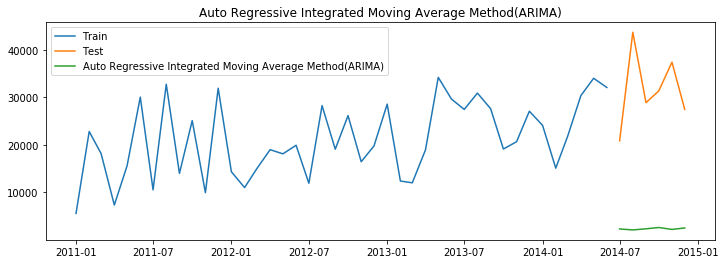

In [157]:

### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='Auto Regressive Integrated Moving Average Method(ARIMA)')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average Method(ARIMA)')
plt.show()

In [158]:
### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive Moving (MA) method,29359.20,89.41
0,Auto Regressive (AR) method,16735.49,44.64
0,Auto Regressive Moving Average (ARMA) method,30203.22,92.17
0,Auto Regressive Integrated Moving Average (ARI...,30203.22,92.17


In [161]:
### Seasonal Auto Regressive Integrated Moving Average(SARIMA)

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox,order = (1,2,3),seasonal_order = (1,1,1,6))
model_fit=model.fit()
print(model_fit.params)

ar.L1     -0.947574
ma.L1     -0.999167
ma.L2     -0.999932
ma.L3      0.999208
ar.S.L6   -0.999696
ma.S.L6    0.976050
sigma2     0.148859
dtype: float64


In [162]:

### Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])


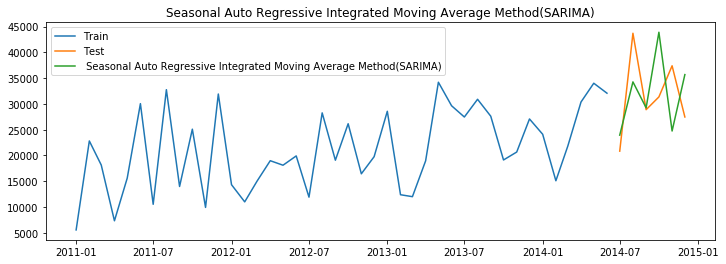

In [163]:
### Plot train,test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label=' Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)')
plt.show()

In [164]:
### Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal Auto Regressive Integrated Moving Average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive Moving (MA) method,29359.20,89.41
0,Auto Regressive (AR) method,16735.49,44.64
0,Auto Regressive Moving Average (ARMA) method,30203.22,92.17
0,Auto Regressive Integrated Moving Average (ARI...,30203.22,92.17
0,Seasonal Auto Regressive Integrated Moving Ave...,8983.37,23.59
